NLU Project

Member 1: Ahmed Gamal Ahmed_20221459969

Member 2: Myar Hany Mohamed_2022376556


Member 3: Mona Badr Mostafa_2103111

Submission Date: 5/5/2024 - Sunday

In [1]:
# Importing the used libraries
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

import speech_recognition as sr

import pyttsx3
import random


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Data Cleaning and Exploration**

In [3]:
# Load the dataset
dataset_path = 'dataset.csv' # path of the our dataset
df = pd.read_csv(dataset_path) # reading the dataset in pandas dataframe

In [4]:
# Drop rows where 'label' is 'love' or 'surprise'
df = df[~df['label'].isin(['love', 'surprise'])]
df.reset_index(drop=True, inplace=True)

In [5]:
# Show the head of the data
print("Head of the dataset:")
df.head()

Head of the dataset:


,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [6]:
# Check for empty rows
print("Checking for empty rows:")
print(df.isnull().sum())

Checking for empty rows:
sentence    0
label       0
dtype: int64


In [7]:
# Count sentences in each label
print("Count of sentences in each label:")
print(df['label'].value_counts())

Count of sentences in each label:
joy        6761
sadness    5797
anger      2709
fear       2373
Name: label, dtype: int64


# **Data and Text Preprocessing**

In [8]:
# Defining the stop words set
stop_words = set(stopwords.words('english'))
print(stop_words)
# Defining our lemmatizer
lemmatizer = WordNetLemmatizer()

{"should've", 'haven', 'myself', 'them', "mustn't", 'same', 'off', 'was', 'yourselves', 'down', 'each', 'of', 'here', "she's", 'as', 'between', 'own', 'most', 'below', 'hadn', "couldn't", 'up', 'just', "wouldn't", "weren't", 'be', "haven't", 'over', 'an', 'don', "you're", 'didn', 'i', 'again', 'our', "doesn't", 'because', 'he', 'through', 'about', 'into', 'wouldn', 're', 'where', "hadn't", 'further', 'so', 'ourselves', "shouldn't", 'these', 'than', 'hasn', 'do', 'for', 'd', 'by', 'couldn', 'such', 'weren', "it's", "that'll", 'yourself', 'which', 'on', 'has', "you'll", 'few', 'had', 'themselves', 'there', 'more', 'have', 'until', 'isn', 'only', 'your', 't', 'are', 'will', 'ma', 's', 'wasn', "you'd", 'doing', 'should', 'above', 'then', 'how', 'am', 'during', 'y', 'did', "hasn't", "isn't", 'his', 'herself', 'needn', 'mightn', 'yours', 'too', 'now', 'hers', 'does', 'o', 'she', 'those', 'him', 'my', 'not', 'aren', 'the', 'were', 'out', 'both', 'can', 've', 'while', 'their', 'with', 'is', 'a

In [9]:
# Function to preprocess the text (sentence)
def preprocess_text(text):
  # This function is doing: Lowercasing, Tokenization, Removing Stop Words, Lemmatization

  # Lowercasing
  text = text.lower() # Getting a lower cased version of the text

  # Tokenization
  tokens = word_tokenize(text) # Splitting the sentence into tokens (splitted words) eg: {"I am the happiest"} to {"I", "am", "the","happiest"}

  # Remove stop words
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # Getting a new version of the sentenve without the stop words
  # if the token is not inisde the stop words, put it in the filtered_tokens array {"I","happiest"}

  # Lemmatization
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens] # Lemmatizing each word inside the filtered tokens eg: {happiest} to {happy}

  # Join tokens back into a sentence
  preprocessed_text = ' '.join(lemmatized_tokens) # Convert from array of tokens to a sentence (string) eg {"I","happy"} to {"I happy"}

  return preprocessed_text # return the preprocessed text

In [10]:
# Preprocess the sentences
df['preprocessed_sentence'] = df['sentence'].apply(preprocess_text) # Calling the function on all the existent sentences

In [11]:
# Mapping labels
label_mapping = {'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3} # Mapping our labels to numbers
df['label_mapped'] = df['label'].map(label_mapping) # New column: label_mapped has all the labels but mapped in numbers from 0 to 5

In [12]:
df.head(10) # Showing first 10 rows of the current data

,sentence,label,preprocessed_sentence,label_mapped
0,i didnt feel humiliated,sadness,didnt feel humiliated,3
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,3
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,0
3,i am feeling grouchy,anger,feeling grouchy,0
4,ive been feeling a little burdened lately wasn...,sadness,ive feeling little burdened lately wasnt sure,3
5,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man,1
6,i have been with petronas for years i feel tha...,joy,petronas year feel petronas performed well mad...,2
7,i feel like i have to make the suffering i m s...,sadness,feel like make suffering seeing mean something,3
8,i do feel that running is a divine experience ...,joy,feel running divine experience expect type spi...,2
9,i think it s the easiest time of year to feel ...,anger,think easiest time year feel dissatisfied,0


# **LSTM Model Creation**

In [13]:
# Splitting Sentences and labels
sentences = df['preprocessed_sentence'].values
labels = df['label_mapped'].values

In [14]:
print(type(sentences))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# Split the data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)
train_labels = to_categorical(train_labels,num_classes = 4) # One hot encoded version of the labels, for example: anger will be represented as 1000, fear will be represnted as 0100 and so on
test_labels = to_categorical(test_labels,num_classes = 4) # One hot encoded

In [16]:
# Tokenization: OOV Tokenizer
# Training set: My Cat is Beautiful
# OOV tokenizer will tokenize each word and give it an index
# The shape of the tokenization: {<OOV>:1, My:2, Cat:3, is: 4, Beautiful: 5}
# When testing, the tokenizer will put index 1 (<OOV>) for any word that is not in the training dataset
# For example: if the test sentence was: The cat is so Beautiful
# The sentence will be represented by {<OOV>, cat, is, <OOV>, Beutiful}

tokenizer = Tokenizer(oov_token='<OOV>') # Put for stranger words this token: <OOV>
tokenizer.fit_on_texts(train_sentences) # Applying the tokenizer on our sentences

In [17]:
# Converting tokenized texts to sequences
# Convert from the text tokens: {<OOV>, cat, is, <OOV>, Beutiful}
# To their indices to be {1,2,4,1,5} (Numerical Representation for our dataset)

train_sequences = tokenizer.texts_to_sequences(train_sentences) # Using the tokenizer to covert from the sentences to sequences of indexes like: [1,3,2,4]
test_sequences = tokenizer.texts_to_sequences(test_sentences) # Doing the same but on test data

In [18]:
# Padding (making all the sentences of the same length)
# In padding we want all the sentences have the same length
# First we are getting the maximum length of all the sentences we have: let's say the longest sentence is represented by {1,3,2,1,3,4,1} (max_length = 7)
# For all the sentences that have length less than 7 for example {1,2,5,1}: convert it to size 7 with adding zeros to the post: {1,2,5,1,0,0,0}
# This is usefull for the LSTM to make all the sentences have the same length (Balancing)

max_length = max(len(seq) for seq in train_sequences) # Getting the maximum length of a sentence
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post') # Applying padding of zeros (post method) to make all of the sequences of the same length
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post') # Doing the same on test dataset

In [20]:
# LSTM Model
vocab_size = len(tokenizer.word_index) + 1 # Size of our vocabulary set (index + 1 because index starts from 0)

model = Sequential() # Our model consists of sequence of layers
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length)) # Embedding: create vector representation of each word keeping the semantic relationships
# Embedding layer is a trainable layer that tries to create a vector of number of each word
# These vectors will try to keep the relationships (context) between words
# For example: the word king and the word queen will have 2 vectors that are very similar eg: [100101] for king, [100111] for queen
# Params:
# Input_Dim: takes the number(size) of unique words(vocabulary) inside our training dataset (vocabulary size)
# Output_Dim: determines the size of the vector that it must create
# Input_Length: takes the length of the input sentences (because we created padding, all of them of size = max_length
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Params:
# Units: Use 100 unit of LSTM
# dropout: the dropout rate of the input
# recurrent_dropout: the dropout rate on the recurrent connections
model.add(Dense(4, activation='softmax')) # Classification Layer
# Has 4 units for our 4 classes (labels)
# Using softmax function to convert the predectinos to probabilites that has sum = 1
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Choosing categorical_crossentropy as our loss function and calculating the accuracy as a metric for evaluation


# **LSTM Model Training**

In [132]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels), batch_size = 32, callbacks=[early_stopping])

Epoch 1/5
441/441 [==============================] - 14s 29ms/step - loss: 1.1421 - accuracy: 0.4259 - val_loss: 0.8629 - val_accuracy: 0.5677
Epoch 2/5
441/441 [==============================] - 12s 27ms/step - loss: 0.5365 - accuracy: 0.7511 - val_loss: 0.3576 - val_accuracy: 0.8427
Epoch 3/5
441/441 [==============================] - 12s 28ms/step - loss: 0.2270 - accuracy: 0.9187 - val_loss: 0.2225 - val_accuracy: 0.9359
Epoch 4/5
441/441 [==============================] - 12s 28ms/step - loss: 0.1185 - accuracy: 0.9652 - val_loss: 0.1644 - val_accuracy: 0.9498
Epoch 5/5
441/441 [==============================] - 12s 28ms/step - loss: 0.0779 - accuracy: 0.9780 - val_loss: 0.1697 - val_accuracy: 0.9501


In [133]:
history2 = model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels), batch_size = 32, callbacks=[early_stopping])

Epoch 1/5


441/441 [==============================] - 13s 28ms/step - loss: 0.0603 - accuracy: 0.9826 - val_loss: 0.1577 - val_accuracy: 0.9529
Epoch 2/5
441/441 [==============================] - 12s 28ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.1990 - val_accuracy: 0.9498
Epoch 3/5
441/441 [==============================] - 12s 28ms/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.1909 - val_accuracy: 0.9473


In [143]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

111/111 [==============================] - 1s 5ms/step - loss: 0.1577 - accuracy: 0.9529
Test Accuracy: 95.29%


In [144]:
model.save('model_95Acc_10(8)Epochs.h5')
model.save_weights('model_95Acc_10(8)Epochs_weights.h5')

In [145]:
history_df1 = pd.DataFrame(history.history)
history_df2 = pd.DataFrame(history2.history)
history_df = pd.concat([history_df1,history_df2],ignore_index=True)
history_df.reset_index(drop=True, inplace=True)
# Save the DataFrame to a CSV file
csv_filename = 'model_95Acc_10(8)Epochs_history.csv'
history_df.to_csv(csv_filename, index=False)

# **LSTM Model Loading**

In [21]:
model = load_model('model_95Acc_10(8)Epochs.h5')
history_df = pd.read_csv('model_95Acc_10(8)Epochs_history.csv')

In [22]:
def test_model(sentence):
    # Preprocess the input sentence
    preprocessed_input = preprocess_text(sentence) # Lowercasing, Tokenization, Removing Stop Words, Lemmatization
    tokenized_input = tokenizer.texts_to_sequences([preprocessed_input]) # Convert text into sequences [1,4,1,3,2]
    padded_input = pad_sequences(tokenized_input, maxlen=max_length, padding='post') # Padding to make them all with the same length

    mapping_label = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'} # Mapping our labels to numbers
    # Prediction
    result = model.predict(padded_input) # Model Predections: [0.01 0.2 0.7 0.02 0.04 0.03]
    predected_index = np.argmax(result) # Getting the index of the maximum probability
    emotion = mapping_label[predected_index] # Convert from indices to emotions {eg: 0 to fear}
    confidence_score = np.max(result)*100 # How much is the model confident of his predection (sure %)
    return emotion,confidence_score


In [23]:
# Test with user input
user_input = "Finding unexpected kindness from strangers can turn an ordinary day into a truly happy one."
lstm_result,lstm_conf = test_model(user_input)

print("Sentence:", user_input)
print("LSTM Prediction:", lstm_result)
print("Confidence: ",lstm_conf)

1/1 [==============================] - 1s 552ms/step
Sentence: Finding unexpected kindness from strangers can turn an ordinary day into a truly happy one.
LSTM Prediction: joy
Confidence:  99.85114932060242


# **LSTM Model Plotting**

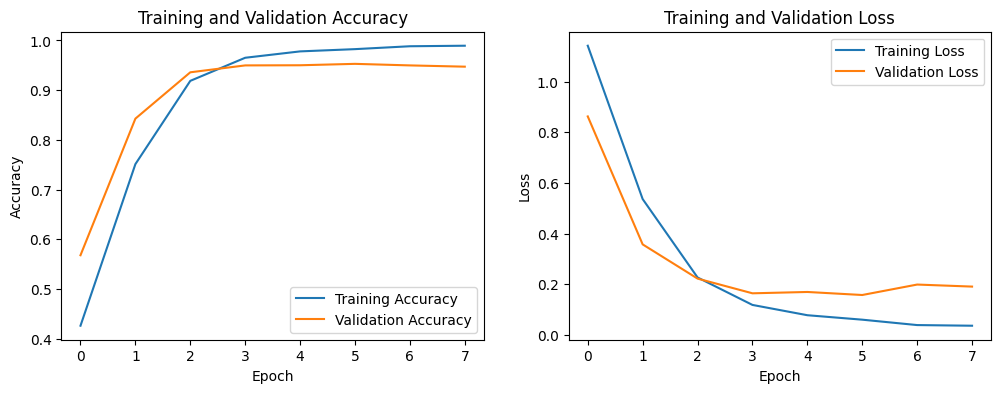

In [24]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# **Naiive Bayes**

In [25]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_sentence'], df['label'], test_size=0.2, random_state=42)

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
# The pipeline makes it easier to manage and apply transformations consistently
nb_model = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), MultinomialNB(alpha=0.05))
# We found out that (by doing Parameter Hypertuining) that alpha = 0.05 gives the highest accuracy
# ngram_range = (1,2) will extract the unigrams and bigrams in the data. and it achieves also the best accuracy after hypertuning
# alpha is a term that identifies how big the probaility of unseen words will affect the model
# alpha = 0.05 means that the unseen words will barely affect the model classification

# Fit the Naive Bayes model using the preprocessed training data and corresponding labels
nb_model.fit(X_train, y_train)

# Predictions using the trained model on the training data
y_nb_pred_train = nb_model.predict(X_train)

# Predictions using the trained model on the testing data
y_nb_pred_test = nb_model.predict(X_test)

# Evaluation
print("\nNaive Bayes Model Evaluation:")

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_nb_pred_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_accuracy = accuracy_score(y_test, y_nb_pred_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
# Explaination
# 1. TfidfVectorizer: Converts a collection of raw documents to a matrix of TF-IDF features.
#    This step helps represent the text data in a numerical format suitable for machine learning models.
#    The default settings of TfidfVectorizer include tokenization, lowercasing, and the removal of stop words.

# 2. MultinomialNB: Implements the Naive Bayes algorithm for multinomially distributed data.
#    It's commonly used for text classification problems.

# The pipeline ensures that the text data is transformed using the TF-IDF vectorizer
# and then fed into the Naive Bayes classifier in a seamless manner.


Naive Bayes Model Evaluation:
Training Accuracy: 99.84%
Test Accuracy: 85.29%


In [26]:
def test_nb(sentence):
    # Preprocess the input sentence
    preprocessed_input = preprocess_text(sentence) # Lowercasing, Tokenization, Removing Stop Words, Lemmatization
    # Prediction
    emotion = nb_model.predict([preprocessed_input])
    confidence_score = nb_model.predict_proba([preprocessed_input])
    confidence_score = np.max(confidence_score) * 100
    return emotion,confidence_score


In [27]:
# Test sentence
test_sentence = "Finding unexpected kindness from strangers can turn an ordinary day into a truly happy one."

# Use the pipeline to transform and predict the label for the test sentence
test_prediction,nb_conf = test_nb(test_sentence) # Print the predicted label for the test sentence

print("Test Sentence: ",test_sentence)
print(f"Prediction for the test sentence: {test_prediction[0]}")
print("Confidence: ",nb_conf)


Test Sentence:  Finding unexpected kindness from strangers can turn an ordinary day into a truly happy one.
Prediction for the test sentence: joy
Confidence:  94.22951146399669


# **Logistic Regression**

In [28]:
# Splitting the data into training and testing datasets for the Logistic Regression Model
train_data, test_data, train_labels, test_labels = train_test_split(df["preprocessed_sentence"],df["label"], test_size=0.2, random_state=42)

In [29]:
# Create an instance of CountVectorizer with a specified maximum number of features
# The 'max_features' parameter limits the number of unique words (features) in the vocabulary
vectorizer = CountVectorizer(max_features=vocab_size)

# Transform the training data using the fitted vectorizer
# This step converts the raw text into a sparse matrix representation, where each row corresponds to a document,
# and each column corresponds to a unique word in the vocabulary.
# For example:
# Vocab:    happy    I    cat     so     am      beautiful  ....
# Row1:       1      1     0      1      1           0      ....
# Row 1 represents the first sentence which is I am so happy
# If happy repeated in a sentence 2 times it will have the value of 2 instead of 1 and so on
X_train = vectorizer.fit_transform(train_data)

# Transform the test data using the same vectorizer
# It's important to use the same vectorizer instance for consistency and to ensure that the same vocabulary is used
# This means that the test data is represented using the same set of features as the training data
X_test = vectorizer.transform(test_data)


In [30]:
# Create an instance of LogisticRegression with a specified maximum number of iterations
# The 'max_iter' parameter determines the maximum number of iterations for optimization
lr_model = LogisticRegression(max_iter=20000)

# Fit the Logistic Regression model using the training data
# The model learns the relationship between the input features ('X_train') and the corresponding labels ('train_labels')
lr_model.fit(X_train, train_labels)

LogisticRegression(max_iter=20000)

In [31]:
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(test_labels, y_pred)
print(f"Testing Accuracy: {accuracy*100}%")

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

Testing Accuracy: 93.45238095238095%

Classification Report:
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       538
        fear       0.90      0.89      0.90       483
         joy       0.96      0.97      0.96      1337
     sadness       0.93      0.94      0.94      1170

    accuracy                           0.93      3528
   macro avg       0.92      0.92      0.92      3528
weighted avg       0.93      0.93      0.93      3528



In [32]:
def test_lr(sentence):
    sentence = [sentence]
    X_test = vectorizer.transform(sentence)
    predicted_emotion = lr_model.predict(X_test)
    confidence_score = lr_model.predict_proba(X_test)
    confidence_score = np.max(confidence_score) * 100
    return predicted_emotion,confidence_score

In [33]:
test_sentence = "Finding unexpected kindness from strangers can turn an ordinary day into a truly happy one."
predicted_emotion,lr_conf = test_lr(test_sentence)
print(lr_conf)
print(predicted_emotion)

96.05733364260311
['joy']


# **3 Models Testing**

In [34]:
engine = pyttsx3.init()

engine.setProperty('rate', 150)    
engine.setProperty('volume', 1) 
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)
def say(sent):
    engine.say(sent)
    engine.runAndWait()


In [35]:
# Loading responses for each label
responses_df = pd.read_csv("responses.csv")
joy_responses = responses_df[responses_df['label'] == 'joy']['response'].tolist()
sadness_responses = responses_df[responses_df['label'] == 'sadness']['response'].tolist()
fear_responses = responses_df[responses_df['label'] == 'fear']['response'].tolist()
anger_responses = responses_df[responses_df['label'] == 'anger']['response'].tolist()

responses = {
    "joy":joy_responses,
    "sadness":sadness_responses,
    "fear":fear_responses,
    "anger":anger_responses
}

In [39]:
r = sr.Recognizer()
with sr.Microphone() as source :

    print("1) LSTM Model")
    print("2) Naiive Bayes Model")
    print("3) Logistic Regression Model")
    print("4) Compare and choose the best")
    say("Enter your choice of models: ")
    choice = int(input("Enter your choice of models: "))
    say("Ok, Now speak anything: ")
    print(f"OK You chose {choice}")
    print("Speak any thing: ")
    audio = r.listen(source)
    try :
        text = r.recognize_google(audio)
        print("\nYou said>>> {} \n".format(text))
        if choice == 1:
            pred,conf = test_model(text)
        elif choice == 2:
            pred,conf = test_nb(text)
        elif choice == 3:
            pred,conf = test_lr(text)
        elif choice == 4:
            pred_lstm,conf_lstm = test_model(text)
            pred_nb,conf_nb = test_nb(text)
            pred_lr,conf_lr = test_lr(text)
            pred_nb = pred_nb[0]
            pred_lr = pred_lr[0]
            print(f"LSTM Model predicted: {pred_lstm} with conf = {conf_lstm}")
            print(f"Naive Bayes Model predicted: {pred_nb} with conf = {conf_nb}")
            print(f"Logistic Regression Model predicted: {pred_lr} with conf = {conf_lr}")
            confidences = np.array([conf_lstm,conf_nb,conf_lr])
            predections = np.array([pred_lstm,pred_nb,pred_lr])
            models = np.array(["LSTM","Naive Bayes","Logistic Regression"])
            best_index = np.argmax(confidences)
            conf = confidences[best_index]
            pred = predections[best_index]
            print(f"\nThe best model was {models[best_index]} with predection: {pred}")
        random_sent = random.choice(responses[pred])
        say(f"{random_sent}")
        print(f"Predicted: {pred} with confidence = {conf}")
        print(f"\n\nYour feeling is {pred}. {random_sent}")
    
    except Exception as e:
        print(e)
        print("Couldn't detect that")

1) LSTM Model
2) Naiive Bayes Model
3) Logistic Regression Model
4) Compare and choose the best
OK You chose 4
Speak any thing: 
result2:
{   'alternative': [   {   'confidence': 0.95212841,
                           'transcript': 'can you tell me my state now'},
                       {'transcript': 'can you tell me my stayed now'},
                       {'transcript': 'can you tell me my stat now'},
                       {'transcript': 'can you tell me my stayt now'},
                       {'transcript': 'can you tell me my staite now'}],
    'final': True}

You said>>> can you tell me my state now 

1/1 [==============================] - 0s 29ms/step
LSTM Model predicted: anger with conf = 56.80013298988342
Naive Bayes Model predicted: joy with conf = 42.1244307309997
Logistic Regression Model predicted: joy with conf = 47.10157459475641

The best model was LSTM with predection: anger
Predicted: anger with confidence = 56.80013298988342


Your feeling is anger.  I'm here to supp